<a href="https://colab.research.google.com/github/MarkHaesevoets/IfLifeWasAJoke/blob/main/MNIST_digit_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix 
import seaborn as sns

np.random.seed(0)

#Data

In [9]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


#Visualize Examples

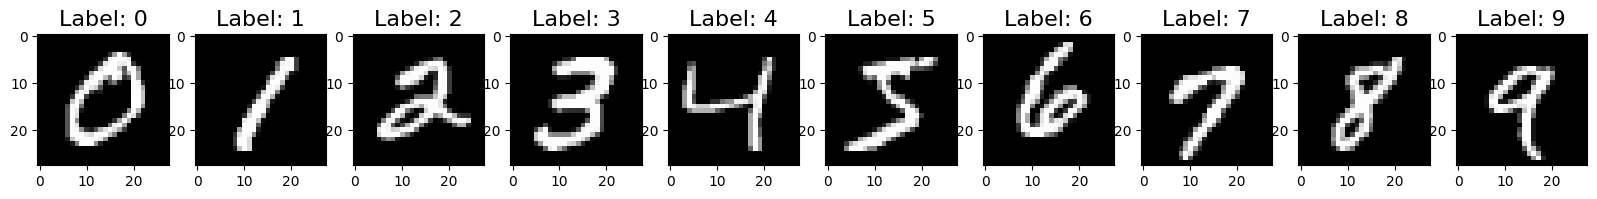

In [13]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = X_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title('Label: {}'.format(i), fontsize=16)

In [14]:
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [15]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [16]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


#Prepare Data

In [17]:
#Normaize Data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [20]:
#Reshape Data
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print(X_train.shape)

(60000, 784)


#Creat Model - Fully Connected Neural Network

In [21]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


#Train

In [22]:
batch_size = 512
epochs = 10
model.fit(x=X_train, y=y_train, batch_size= batch_size, epochs = epochs)

Epoch 1/10
118/118 [==============================] - 2s 10ms/step - loss: 0.6022 - accuracy: 0.8261
Epoch 2/10
118/118 [==============================] - 1s 10ms/step - loss: 0.2239 - accuracy: 0.9350
Epoch 3/10
118/118 [==============================] - 2s 13ms/step - loss: 0.1636 - accuracy: 0.9524
Epoch 4/10
118/118 [==============================] - 1s 11ms/step - loss: 0.1297 - accuracy: 0.9622
Epoch 5/10
118/118 [==============================] - 1s 10ms/step - loss: 0.1063 - accuracy: 0.9679
Epoch 6/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0886 - accuracy: 0.9740
Epoch 7/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0762 - accuracy: 0.9770
Epoch 8/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0671 - accuracy: 0.9797
Epoch 9/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0574 - accuracy: 0.9833
Epoch 10/10
118/118 [==============================] - 1s 12ms/step - loss: 0.0521 - accura

#Evaluate

In [23]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Loss: {}, Test Accuracy: {}'.format(test_loss, test_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.0748 - accuracy: 0.9766
Test Loss: 0.07482512295246124, Test Accuracy: 0.9765999913215637


In [24]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 1s 2ms/step
[[4.3310083e-06 1.1740632e-05 3.1434789e-05 ... 9.9986100e-01
  1.0512969e-05 4.1082312e-06]
 [6.4946641e-07 2.6855839e-03 9.9723953e-01 ... 1.0448627e-08
  2.0797686e-05 7.0252391e-09]
 [3.5141362e-05 9.9417329e-01 7.0373307e-04 ... 2.8387934e-03
  1.0878036e-03 1.3741299e-04]
 ...
 [7.4368049e-09 7.7812540e-10 1.1895497e-09 ... 2.4297611e-07
  6.4403355e-07 7.6257320e-06]
 [4.0317066e-11 2.1446269e-08 4.8090646e-12 ... 9.7295470e-11
  2.1230737e-05 1.0158183e-09]
 [2.0569422e-09 3.0237274e-11 4.5625914e-10 ... 3.4800068e-13
  2.0938952e-08 4.2677889e-13]]
[7 2 1 ... 4 5 6]


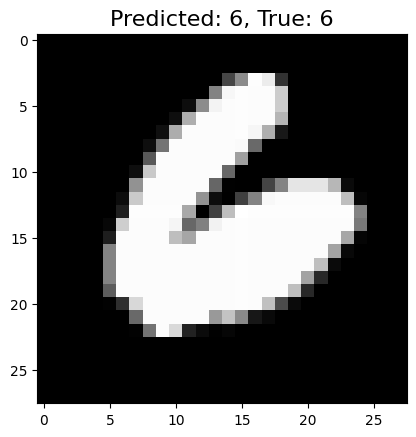

In [31]:
#single example
random_idx = np.random.choice(len(X_test))
X_sample = X_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(X_sample.reshape(28,28), cmap='gray')

#Confusion matrix

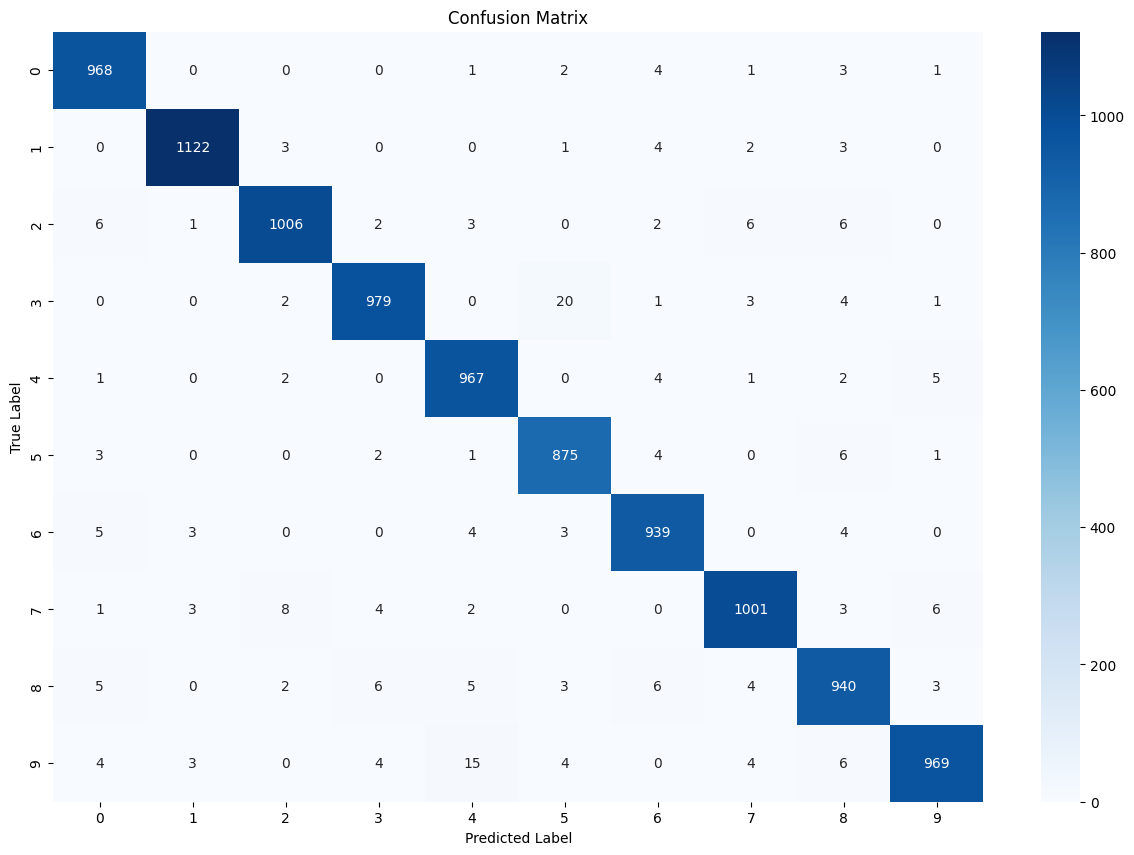

In [35]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

#Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

#Investigate Errors

In [44]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
X_test_errors = X_test[errors]

In [41]:
y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

#Get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:]

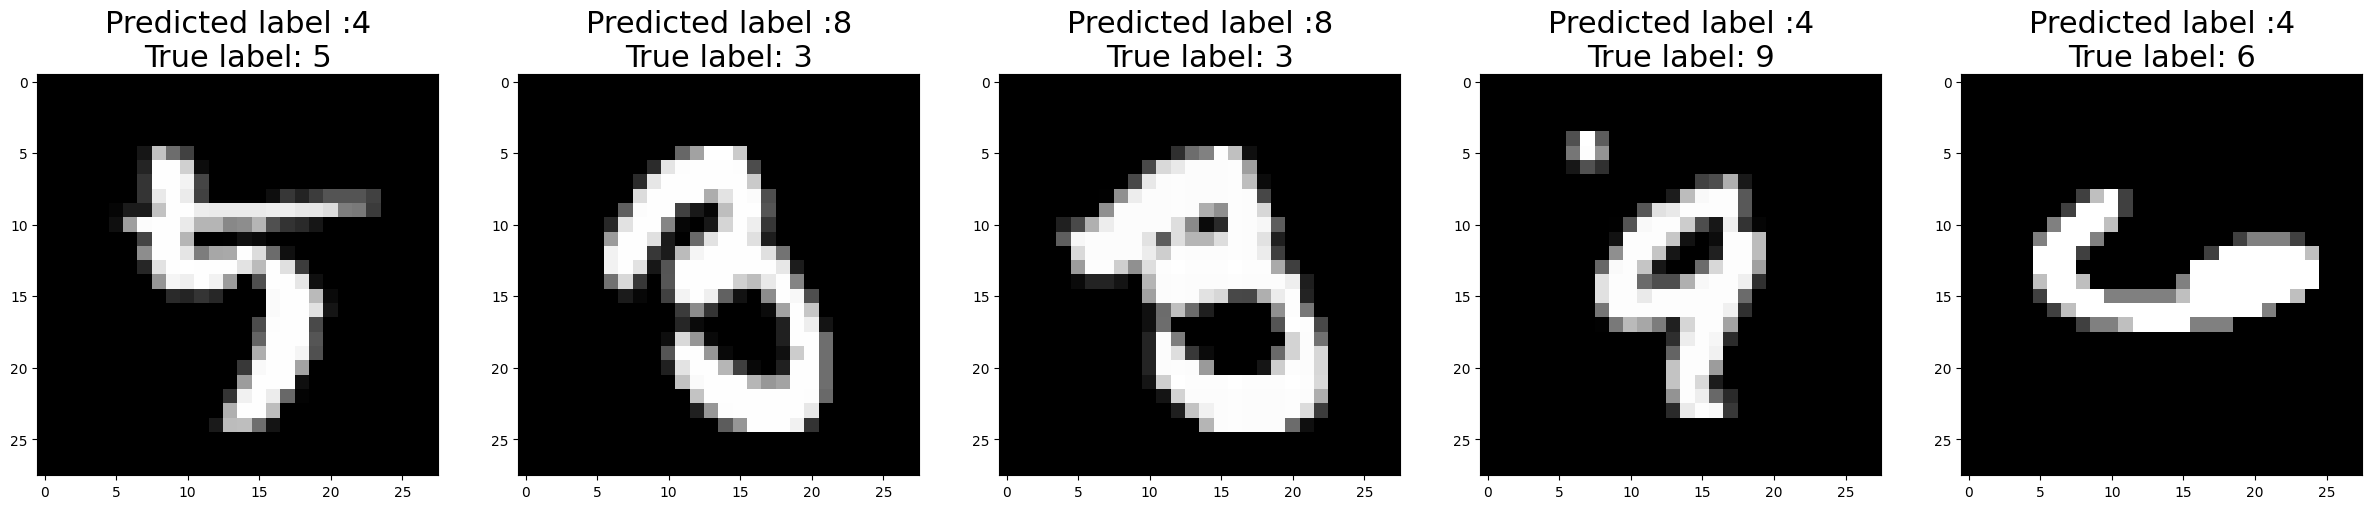

In [46]:
#Show Top errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30,30))

for i in range(0,num):
  idx = top_idx_diff_errors[i]
  sample = X_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Predicted label :{}\nTrue label: {}".format(y_p, y_t), fontsize=22)